## 목차 ##
0. Basic Setup
1. EDA Quest

# Basic Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sys

#경고창이 뜨지 않도록 해주는 것
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline 

주피터 노트북에서 시각화할때, matplotlib가 한글 폰트 지원하지 않아, 깨짐 처리해줘야 함

In [3]:
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

# 3. EDA Quest 
#### 주어진 두 개의 데이터셋을 바탕으로 아래의 질문에 대한 자신만의 해답을 코드와 함께 **간단하게**(약 2-3줄 내외) 적어 제출해주세요!
 
 *   *airbnb.csv*  관련 문제
     1.   'price', 'review_scores_rating', 'latitude'에 대해서 변수의 종류는 무엇이며, 분포는 어떻게 되어있나요? 각 변수의 특징과 함께 서술해주세요!
     2.   위의 데이터에 이상치/결측치가 있나요? 있다면 어떻게 처리해야 할까요?

 *   *summer_product.csv* 관련 문제
    1.    해당 데이터를 제공한 업체에서 새로이 광고를 달기 위해 상품을 Grading 하려고 합니다. 이를 위해 상품별 매출을 구하고 1) IQR을 기준으로 이상치를 제거해 본 후 2) 이러한 방식이 적절한지 설명한 후, 다른 방식이 있다면 제시해주세요!
    2.    임의의 두 컬럼을 정하고(질적 변수 중 하나, 양적 변수 중 하나), 해당 데이터가 매출과 어떤 관계가 있는지 분석해주세요! 
    3.    해당 데이터에서 1) 매출과 rating간의 상관관계와 매출과 2) merchant rating 간의 상관관계를 비교하고 싶을때, 각 변수의 분포를 고려하면 어떤 점에 유의해야 할까요?


## airbnb.csv 관련 문제

In [5]:
#import하고 스킴

df_ab = pd.read_csv("airbnb_listings.csv")
df_ab.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47


In [6]:
df_ab.info()

# 'price':object(string)/결측치 없음, 'review_scores_rating':float64/결측치 있음, 'latitude':float64/결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [7]:
#price를 float으로 바꿔주가
def delcom(str):
    return str.replace(',','')

df_ab.price = df_ab.price.str[1:].apply(delcom).apply(float)

Skewness: 8.521484
Kurtosis: 168.351704


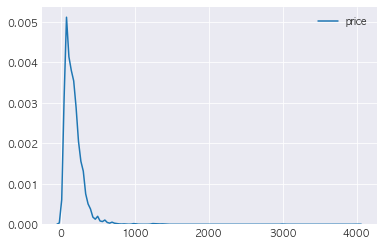

In [8]:
#price 분포 확인
kdep=sns.kdeplot(df_ab.price) 
print("Skewness: %f" % df_ab.price.skew())
print("Kurtosis: %f" % df_ab.price.kurt())
#양의 왜도, outlier가 있으므로 사전에 뺴주는 작업이 필요해 보임

Skewness: -2.671447
Kurtosis: 11.556325


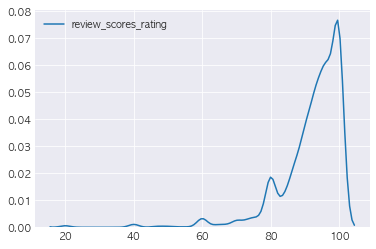

In [9]:
#review_scores_rating 분포 확인
kdep=sns.kdeplot(df_ab.review_scores_rating) 

print("Skewness: %f" % df_ab.review_scores_rating.skew()) 
print("Kurtosis: %f" % df_ab.review_scores_rating.kurt()) 
#음의 왜도를 보임, 모든 값이 극단적이지는 않으므로 outlier를 필터링할 필요는 없어 보임.

Skewness: -2.671447
Kurtosis: 11.556325


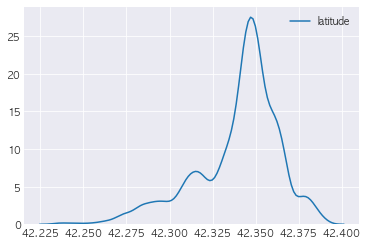

In [10]:
#latitude 분포 확인
kdep=sns.kdeplot(df_ab.latitude) 

print("Skewness: %f" % df_ab.review_scores_rating.skew()) 
print("Kurtosis: %f" % df_ab.review_scores_rating.kurt()) 
#음의 왜도를 보임, 모든 값이 극단적이지는 않으므로 outlier를 필터링할 필요는 없어 보임. 
#넓지 않은 구간에서 나타나므로 미국의 특정 구역을 중심으로 한 데이터라는 것을 알 수 있음

## 결론
### 1. 세 변수에 관하여
'price':object(string)/결측치 없음, 양의 왜도, outlier가 있으므로 사전에 뺴주는 작업이 필요해 보임

'review_scores_rating':float64/결측치 있음, 음의 왜도를 보임, 모든 값이 극단적이지는 않으므로 outlier를 필터링할 필요는 없어 보임.

'latitude':float64/결측치 없음, 음의 왜도를 보임, 모든 값이 극단적이지는 않으므로 outlier를 필터링할 필요는 없어 보임. 
           +넓지 않은 구간에서 나타나므로 미국의 특정 구역을 중심으로 한 데이터라는 것을 알 수 있음
### 2. 이상치, 결측치에 관하여
price의 이상치는 터무니없이 비싼 허위 매물일 가능성이 있음. 통계량을 왜곡시킬 수 있으니 적당한 범위에서 빼는 것이 좋아 보임

review_scores_rating의 결측치(아직 리뷰가 없는 경우)는 양이 상당히 많아서 해당 변수와 상관 없는 경우 평균값으로 채우는 것이 적절하나, 
해당 변수와 직접적으로 관련된 것을 알아보기 위해서는 빼는 것이 좋을 수 있음.


## summer_product.csv 관련 문제
1. 상품별 매출을 구하고 1) IQR을 기준으로 이상치를 제거해 본 후 2) 이러한 방식이 적절한지 설명한 후, 다른 방식이 있다면 제시

In [11]:
df_sp = pd.read_csv('./summer_product.csv')
df_sp.head(3)

,Unnamed: 0,title,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,...,tags,product_color,product_variation_inventory,origin_country,merchant_name,merchant_rating_count,merchant_rating,merchant_id,theme,crawl_month
0,0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,EUR,100,0,3.76,54,0,...,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,50,CN,zgrdejia,568,4.128521,595097d6a26f6e070cb878d1,summer,2020-08
1,1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,8.0,22,EUR,20000,1,3.45,6135,0,...,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,50,CN,sarahouse,17752,3.899673,56458aa03a698c35c9050988,summer,2020-08
2,2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,8.0,43,EUR,100,0,3.57,14,0,...,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,1,CN,hxt520,295,3.989831,5d464a1ffdf7bc44ee933c65,summer,2020-08


In [12]:
#데이터 스킴
df_sp.info()

#매출을 구하기 위해 먼저 currency 통일여부 확인
df_sp.groupby(['currency_buyer'])['currency_buyer'].count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1573 non-null   int64  
 1   title                        1573 non-null   object 
 2   price                        1573 non-null   float64
 3   retail_price                 1573 non-null   int64  
 4   currency_buyer               1573 non-null   object 
 5   units_sold                   1573 non-null   int64  
 6   uses_ad_boosts               1573 non-null   int64  
 7   rating                       1573 non-null   float64
 8   rating_count                 1573 non-null   int64  
 9   badges_count                 1573 non-null   int64  
 10  badge_local_product          1573 non-null   int64  
 11  badge_product_quality        1573 non-null   int64  
 12  badge_fast_shipping          1573 non-null   int64  
 13  tags              

currency_buyer
EUR    1573
Name: currency_buyer, dtype: int64

Skewness: 4.497177
Kurtosis: 29.207157


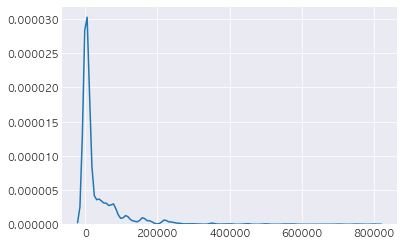

In [13]:
#매출 구하고 분포 확인
sp_revenue = df_sp.price.multiply(df_sp.units_sold)
df_sp['revenue'] = sp_revenue

kdep=sns.kdeplot(sp_revenue) 

print("Skewness: %f" % sp_revenue.skew()) 
print("Kurtosis: %f" % sp_revenue.kurt()) 


#양의 왜도, 300000정도를 기준으로 이상치가 있음

In [14]:
#매출 상위 1퍼센트 데이터 제거
df_sp = df_sp[df_sp.revenue < df_sp.revenue.quantile(0.99)]
df_sp.revenue

0         1600.0
1       160000.0
2          800.0
3        40000.0
4          272.0
          ...   
1568     60000.0
1569       200.0
1570       500.0
1571      1300.0
1572       700.0
Name: revenue, Length: 1554, dtype: float64

Skewness: 2.500102
Kurtosis: 6.691718


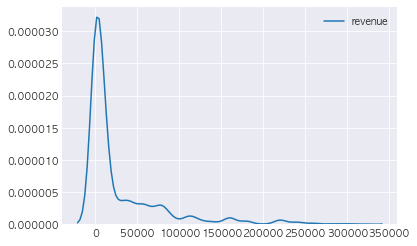

In [15]:
#분포 확인

kdep=sns.kdeplot(df_sp.revenue) 

print("Skewness: %f" % df_sp.revenue.skew()) 
print("Kurtosis: %f" % df_sp.revenue.kurt()) 


#양의 왜도, 매출이 과도하게 높은 이상치는 제거했음

### 결론
이상치가 많지 않은 경우는 해당 값을 정렬한 뒤 필요없는 값만 손수 빼주어도 괜찮을 것 같음. IQR로 정하면 어느정도 값이 적절할지에 대한 감을 잡기 어려운 것 같음.

그러나 이 경우 편차가 크다는 매출의 특성상 매출이 높은 품목을 outlier로 설정하기는 무리가 있으니 로그스케일로 보든가 하는 다른 방식을 이용하는 것이 더 좋을 수 있어보임.

## 2. 두 변수의 매출과 관계 파악


In [16]:
#origin country와 revenue의 관계를 알고 싶다.

print('count by origin country\n', df_sp.groupby(['origin_country'])['revenue'].count(),sep='')

print('\naverage revenue by origin country\n', df_sp.groupby(['origin_country'])['revenue'].mean(),sep='')

print('\nstandard deviation by origin country\n', df_sp.groupby(['origin_country'])['revenue'].std(),sep='')

#원산지별로 매출 평균은 중국이 미국보다 크다는 것을 알 수 있음(나머지는 수가 적어 무의미하다고 할 수 있음)
#그러나 중국 원산지의 매출은 편차가 크다는 것 또한 알 수 있음

count by origin country
origin_country
AT       1
CN    1498
GB       1
SG       2
US      31
VE       5
Name: revenue, dtype: int64

average revenue by origin country
origin_country
AT      700.000000
CN    30201.115254
GB     9000.000000
SG    28496.500000
US    13949.096774
VE      684.900000
Name: revenue, dtype: float64

standard deviation by origin country
origin_country
AT             NaN
CN    51505.884241
GB             NaN
SG    39744.350850
US    26254.310877
VE      632.361981
Name: revenue, dtype: float64


P-value of Pearson test = 0.06791094454762535


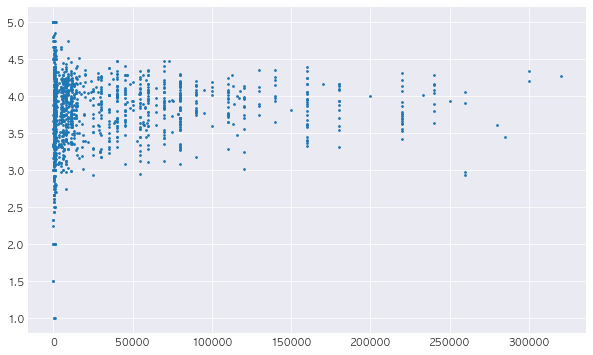

In [17]:
#rating과 revenue의 관계 파악

plt.figure(figsize=(10,6))
plt.scatter(df_sp.revenue,df_sp.rating, s=3)

from scipy.stats import pearsonr

print('P-value of Pearson test =',pearsonr(df_sp.revenue,df_sp.rating)[1])

#pvalue가 0.05 이상이므로 rating과 revenue 간에 선형 상관관계가 있다고 보기 어렵고, 
#산점도 개형 상으로도 특정한 관계가 있어 보이지는 않음.

### 결론
1) 원산지와 매출의 관계
원산지별로 매출 평균은 중국이 미국보다 크다는 것을 알 수 있음(나머지는 수가 적어 무의미하다고 할 수 있음)
그러나 중국 원산지의 매출은 이상치를 제거해도 다른 원산지 품목보다 편차가 크다는 것 또한 알 수 있음

2) rating과 매출 간의 관계
pvalue가 0.05 이상이므로 rating과 revenue 간에 선형 상관관계가 있다고 보기 어렵고, 
산점도 개형 상으로도 특정한 관계가 있어 보이지는 않음.

## 추가문제 3
해당 데이터에서 1) 매출과 rating간의 상관관계와 2) 매출과 merchant rating 간의 상관관계를 비교하고 싶을때, 각 변수의 분포를 고려하면 어떤 점에 유의해야 할까요?

P-value of Pearson test = 2.8798622926703817e-10


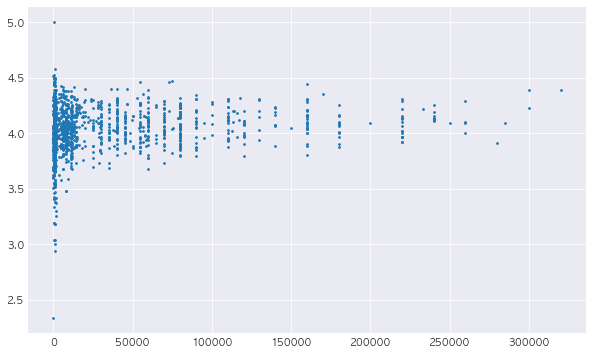

In [19]:
#merchant_rating과 revenue의 관계 파악

plt.figure(figsize=(10,6))
plt.scatter(df_sp.revenue,df_sp.merchant_rating, s=3)

from scipy.stats import pearsonr

print('P-value of Pearson test =',pearsonr(df_sp.revenue,df_sp.merchant_rating)[1])

#pvalue가 0.05 이상이므로 rating과 revenue 간에 선형 상관관계가 있다고 보기 어렵고, 
#산점도 개형 상으로도 특정한 관계가 있어 보이지는 않음.

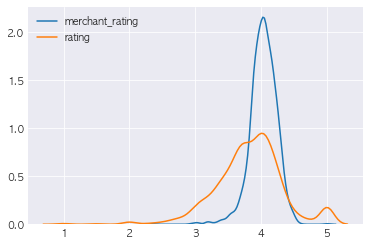

In [20]:
#분포 확인

kdep=sns.kdeplot(df_sp.merchant_rating) 
kdep=sns.kdeplot(df_sp.rating) 

## 결론

merchant_rating은 4점 근처에 크게 몰려있는 것을 확인할 수 있으며, 분산이 훨씬 작기 때문에 rating보다 더 강한 선형성을 보일 수 있다. 

하지만 4점 근처에 모두 모여있다는 뜻은 선형회귀했을 때 상수항수 y=4에 가깝게 나올 가능성이 높기 때문에, 선형성만 강할 뿐 정작 목적함수(revenue)에 필요한 기울기값을 갖기 어렵다는 문제점이 있어 merchant_rating이 rating보다 revenue와의 상관계수 및 선형성 p-value가 유의미하게 다르게 나타나는 것은 단순 표준편차에 의한 것일 뿐 회귀적 의미를 갖는다고 보기는 어렵다.